# 🐕 Proyecto de Portafolio: Análisis y Predicción en Refugios de Animales

## 📦 Paso 1: Configuración del Entorno y Librerías

In [8]:
# Librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

# Para evitar warnings molestos
import warnings
warnings.filterwarnings('ignore')

print('✅ Librerías cargadas correctamente!')

✅ Librerías cargadas correctamente!


## 📥 Paso 2: Ingesta de Datos (Austin Animal Center)

In [9]:
# Dataset correcto: Austin Animal Center Outcomes
# Fuente: Kaggle (datos actualizados)

url = "https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD"

print('📥 Descargando datos de Austin Animal Center...')
df = pd.read_csv(url)
print(f'✅ Dataset cargado: {df.shape[0]:,} registros, {df.shape[1]} columnas')

# Ver las primeras filas
df.head()

📥 Descargando datos de Austin Animal Center...
✅ Dataset cargado: 173,775 registros, 12 columnas


,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A668305,2012-12-01,NaN,2013-12-02T00:00:00-05:00,12-2013,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Brown/Yellow
1,A673335,2012-02-22,NaN,2014-02-22T00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon,Black/Gray
2,A675999,2013-04-03,NaN,2014-04-07T00:00:00-05:00,04-2014,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Green
3,A679066,2014-04-16,NaN,2014-05-16T00:00:00-05:00,05-2014,NaN,NaN,Other,Unknown,4 weeks,Rabbit Sh,Brown
4,A680855,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


## 🔍 Paso 3: Exploración Inicial de Datos (EDA)

In [10]:
# Ver las primeras filas
df.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A668305,2012-12-01,NaN,2013-12-02T00:00:00-05:00,12-2013,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Brown/Yellow
1,A673335,2012-02-22,NaN,2014-02-22T00:00:00-05:00,02-2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon,Black/Gray
2,A675999,2013-04-03,NaN,2014-04-07T00:00:00-05:00,04-2014,Transfer,Partner,Other,Unknown,1 year,Turtle Mix,Green
3,A679066,2014-04-16,NaN,2014-05-16T00:00:00-05:00,05-2014,NaN,NaN,Other,Unknown,4 weeks,Rabbit Sh,Brown
4,A680855,2014-05-25,NaN,2014-06-10T00:00:00-05:00,06-2014,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [11]:
# Información del dataset
print('📊 Información del Dataset:')
print('=' * 50)
df.info()

📊 Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173775 entries, 0 to 173774
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         173775 non-null  object
 1   Date of Birth     173775 non-null  object
 2   Name              123991 non-null  object
 3   DateTime          173775 non-null  object
 4   MonthYear         173775 non-null  object
 5   Outcome Type      173729 non-null  object
 6   Outcome Subtype   79660 non-null   object
 7   Animal Type       173775 non-null  object
 8   Sex upon Outcome  173774 non-null  object
 9   Age upon Outcome  173766 non-null  object
 10  Breed             173775 non-null  object
 11  Color             173775 non-null  object
dtypes: object(12)
memory usage: 15.9+ MB


In [12]:
# Estadísticas descriptivas
df.describe(include='all')

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,173775,173775,123991,173775,173775,173729,79660,173775,173774,173766,173775,173775
unique,156237,8692,29756,146382,140,11,26,5,5,55,3010,663
top,A721033,2016-05-01,Luna,2016-04-18T00:00:00-05:00,06-2019,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,121,760,39,2244,84598,40410,94505,60933,28782,34039,17999


In [13]:
# Verificar valores nulos
print('\n🔍 Valores Nulos por Columna:')
print('=' * 50)
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
null_df = pd.DataFrame({'Nulos': null_counts, 'Porcentaje': null_pct})
null_df[null_df['Nulos'] > 0].sort_values('Porcentaje', ascending=False)


🔍 Valores Nulos por Columna:


,Nulos,Porcentaje
Outcome Subtype,94115,54.16
Name,49784,28.65
Outcome Type,46,0.03
Age upon Outcome,9,0.01
Sex upon Outcome,1,0.00


## 📈 Paso 4: Visualización de Patrones y Distribuciones

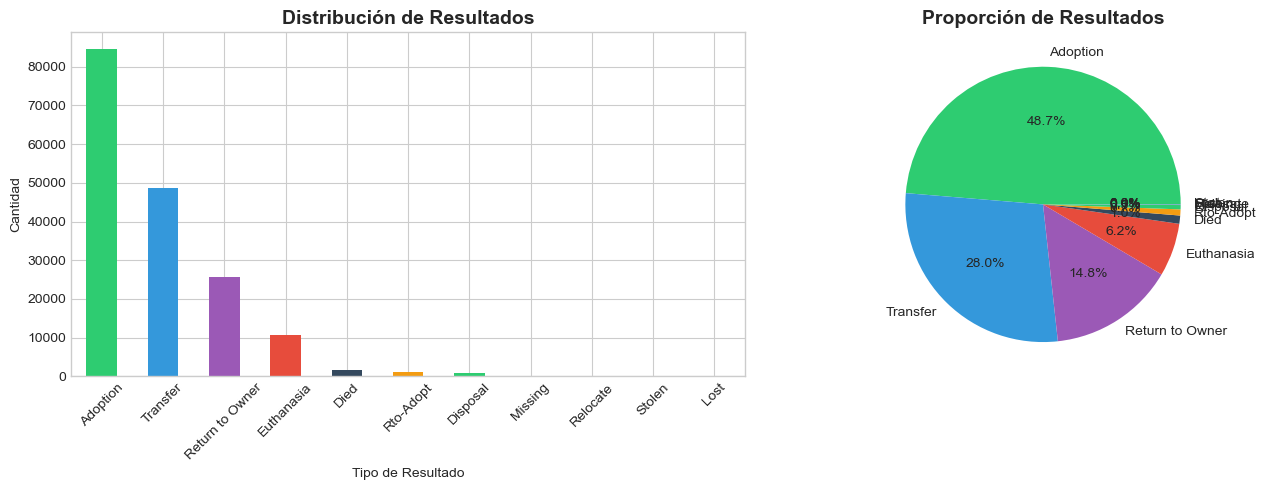


📊 Resumen de Resultados:
Outcome Type
Adoption           84598
Transfer           48689
Return to Owner    25691
Euthanasia         10833
Died                1672
Rto-Adopt           1241
Disposal             877
Missing               92
Relocate              29
Stolen                 5
Lost                   2
Name: count, dtype: int64


In [14]:
# Distribución de resultados (Outcome Type)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
outcome_counts = df['Outcome Type'].value_counts()
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#34495e', '#f39c12']
outcome_counts.plot(kind='bar', ax=axes[0], color=colors[:len(outcome_counts)])
axes[0].set_title('Distribución de Resultados', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tipo de Resultado')
axes[0].set_ylabel('Cantidad')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de pastel
outcome_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=colors[:len(outcome_counts)])
axes[1].set_title('Proporción de Resultados', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print('\n📊 Resumen de Resultados:')
print(outcome_counts)

### 4.2 ¿Qué tipos de animales hay en el refugio?

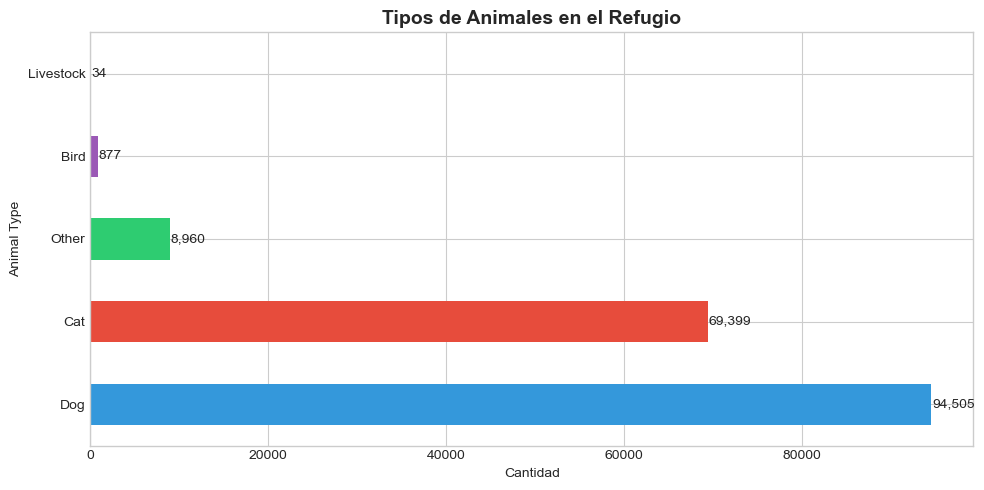

In [15]:
# Distribución por tipo de animal
fig, ax = plt.subplots(figsize=(10, 5))

animal_counts = df['Animal Type'].value_counts()
animal_counts.plot(kind='barh', ax=ax, color=['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12'])
ax.set_title('Tipos de Animales en el Refugio', fontsize=14, fontweight='bold')
ax.set_xlabel('Cantidad')

# Agregar valores en las barras
for i, v in enumerate(animal_counts.values):
    ax.text(v + 100, i, f'{v:,}', va='center')

plt.tight_layout()
plt.show()

### 4.3 ¿Cómo varían los resultados entre perros y gatos?

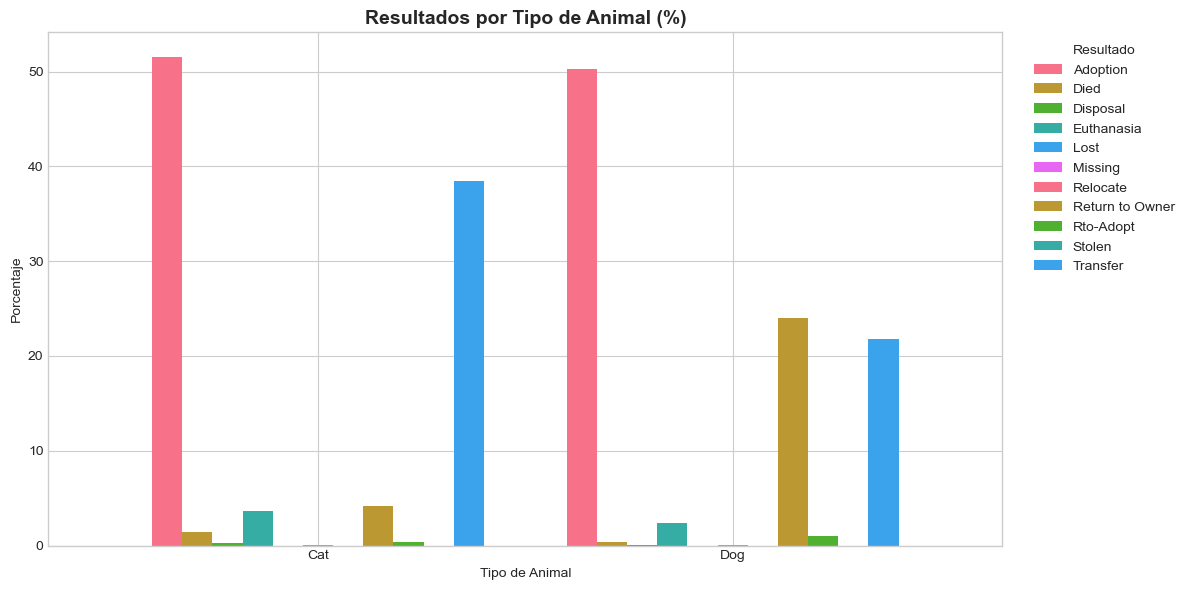


📊 Tabla de Porcentajes:
Outcome Type  Adoption  Died  Disposal  Euthanasia  Lost  Missing  Relocate  \
Animal Type                                                                   
Cat              51.57  1.45      0.24        3.69   0.0     0.07      0.01   
Dog              50.25  0.43      0.10        2.34   0.0     0.04      0.00   

Outcome Type  Return to Owner  Rto-Adopt  Stolen  Transfer  
Animal Type                                                 
Cat                      4.13       0.36    0.00     38.48  
Dog                     24.01       1.05    0.01     21.77  


In [16]:
# Comparación de resultados: Perros vs Gatos
dogs_cats = df[df['Animal Type'].isin(['Dog', 'Cat'])]

# Crear tabla cruzada
cross_tab = pd.crosstab(dogs_cats['Animal Type'], dogs_cats['Outcome Type'], normalize='index') * 100

# Visualizar
fig, ax = plt.subplots(figsize=(12, 6))
cross_tab.plot(kind='bar', ax=ax, width=0.8)
ax.set_title('Resultados por Tipo de Animal (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Tipo de Animal')
ax.set_ylabel('Porcentaje')
ax.legend(title='Resultado', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print('\n📊 Tabla de Porcentajes:')
print(cross_tab.round(2))

## 🧠 Paso 5: Análisis de Factores de Exito y Riesgo

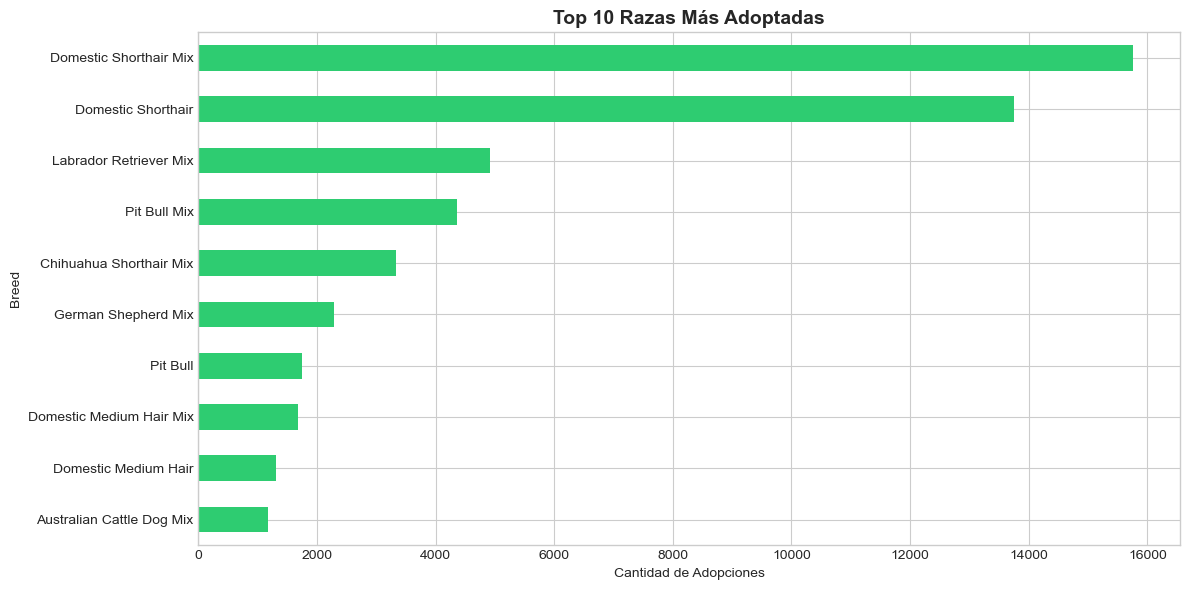

In [17]:
# Top 10 razas más adoptadas
adoptions = df[df['Outcome Type'] == 'Adoption']

top_breeds = adoptions['Breed'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
top_breeds.plot(kind='barh', ax=ax, color='#2ecc71')
ax.set_title('Top 10 Razas Más Adoptadas', fontsize=14, fontweight='bold')
ax.set_xlabel('Cantidad de Adopciones')
ax.invert_yaxis()  # Mayor arriba

plt.tight_layout()
plt.show()

## 🎨 Paso 6: Análisis de Atributos Visuales (Color)

In [ ]:
# Colores más comunes y su tasa de adopción
plt.figure(figsize=(12, 6))
top_colors = df['Color'].value_counts().head(10)
top_colors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Colores Más Comunes')
plt.ylabel('Cantidad de Animales')
plt.show()

# ¿Se adoptan más ciertos colores?
color_adoption = df.groupby('Color')['Outcome Type'].apply(lambda x: (x == 'Adoption').mean()).sort_values(ascending=False).head(10)
print("Tasa de adopción por color (Top 10):")
print(color_adoption)

## 📅 Paso 7: Análisis de Tendencias Temporales

Identificamos estacionalidad en las adopciones para optimizar la planificación de recursos del refugio.

In [ ]:
# Convertir a datetime y analizar por mes
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['Month'] = df['DateTime'].dt.month

adoptions_by_month = df[df['Outcome Type'] == 'Adoption']['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
adoptions_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Tendencia de Adopciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Adopciones')
plt.xticks(range(1, 13))
plt.show()

## ⏳ Paso 8: Impacto de la Edad en el Destino del Animal

Evaluamos la correlación entre la edad al momento del resultado y la probabilidad de adopción exitosa.

In [ ]:
# Relación entre edad y adopción
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age upon Outcome', hue='Outcome Type', 
              order=df['Age upon Outcome'].value_counts().head(10).index)
plt.title('Distribución de Resultados por Edad (Top 10 edades)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---

## 🎯 Próximos Pasos

En el siguiente notebook:
1. **Feature Engineering**: Transformar datos para ML
2. **Modelado**: Entrenar un modelo de clasificación
3. **Evaluación**: Medir el rendimiento del modelo

---

**💡 Conexión con tu proyecto:**
Este análisis es similar a lo que harás con tu plataforma de animales callejeros:
- En vez de predecir "adoption outcome", predecirás "nivel de urgencia"
- En vez de usar datos tabulares, usarás imágenes
- Los conceptos de EDA, feature engineering y modelado son los mismos

🐕🐈 **¡Cada animal que analizamos podría ser una vida salvada!**